#📊 Employee Attrition Prediction using Machine Learning

This project aims to analyze employee data to identify key factors influencing voluntary attrition and to build machine learning models that can accurately predict whether an employee is likely to resign. Using a real-world HR dataset, we perform data preprocessing, exploratory data analysis (EDA), model training (Logistic Regression, Random Forest, XGBoost), and interpretability analysis using SHAP. The goal is to provide actionable insights for HR teams to improve employee retention strategies.

##Random Forest

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Loading data and checking missing values

In [ ]:
df = pd.read_csv("IBM HR Data new 1 4.csv")  # Load the dataset
print(df.head())  # Show first few rows
print(df.info())  # Get column details and check for missing values
print(df.isnull().sum())  # Check missing values count per column


    Age              Attrition BusinessTravel  DailyRate Department  \
0  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
1  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
2  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
3  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
4  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   

   DistanceFromHome  Education EducationField  EmployeeCount EmployeeNumber  \
0               1.0        2.0  Life Sciences            1.0              1   
1               1.0        2.0  Life Sciences            1.0              1   
2               1.0        2.0  Life Sciences            1.0              7   
3               1.0        2.0  Life Sciences            1.0              8   
4               1.0        2.0  Life Sciences            1.0              9   

   ... StandardHours  StockOptionLevel TotalWorkingYears  \
0  ...          80.0               0.0

<ipython-input-4-bdb3f46445a5>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("IBM HR Data new 1 4.csv")  # Load the dataset


Filling Missing Values Based on Data Type

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


<ipython-input-5-0233da9c029c>:6: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


Preparing Input Features and Target for Modeling

In [ ]:
X = df.drop("Attrition", axis=1)  # Drop target column from features
y = df["Attrition"]  # Target variable

# Verify target values
print(y.value_counts())


Attrition
Current employee         19727
Voluntary Resignation     3709
Name: count, dtype: int64


Identifying Categorical Features

In [ ]:

cat_cols = X.select_dtypes(include=['object']).columns  # Get categorical columns
print("Categorical Columns:", cat_cols)


Categorical Columns: Index(['BusinessTravel', 'Department', 'EducationField', 'EmployeeNumber',
       'Application ID', 'Gender', 'JobRole', 'MaritalStatus', 'Over18',
       'OverTime', 'Employee Source'],
      dtype='object')


Dropping Irrelevant or Identifier Columns

In [ ]:
X = X.drop(["EmployeeNumber", "Application ID"], axis=1)


Encoding Categorical Variables with One-Hot Encoding

In [ ]:
X = pd.get_dummies(X, drop_first=True)  # Drop first category to avoid multicollinearity


Encoding Target Variable Using Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts 'Voluntary Resignation' → 1, 'No' → 0


Splitting Data into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=42)


Training Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize model
rf_model.fit(X_train, y_train)  # Train the model


RandomForestClassifier(random_state=42)

Making Predictions on Test Data

In [ ]:
y_pred = rf_model.predict(X_test)


Evaluating Model Performance

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy Score
print(classification_report(y_test, y_pred))  # Detailed Report


Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



Extracting and Ranking Feature Importances

In [ ]:
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print(feature_importances)


                              Feature    Importance
0                                 Age  9.650128e-02
1                           DailyRate  7.760157e-02
6                          HourlyRate  6.032135e-02
10                      MonthlyIncome  6.016109e-02
2                    DistanceFromHome  5.684237e-02
11                        MonthlyRate  4.794465e-02
18                  TotalWorkingYears  4.131348e-02
13                  PercentSalaryHike  3.696318e-02
21                     YearsAtCompany  3.202787e-02
3                           Education  2.857000e-02
24               YearsWithCurrManager  2.745653e-02
19              TrainingTimesLastYear  2.678739e-02
22                 YearsInCurrentRole  2.619677e-02
5             EnvironmentSatisfaction  2.538739e-02
23            YearsSinceLastPromotion  2.430738e-02
15           RelationshipSatisfaction  2.357599e-02
9                     JobSatisfaction  2.317866e-02
47                       OverTime_Yes  2.204535e-02
17          

Dropping Low-Importance or Redundant Features

In [ ]:
X = X.drop(["StandardHours", "EmployeeCount", "EducationField_Test", "Over18_y"], axis=1)


Hyperparameter Tuning Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


Feature Reduction Based on Importance Ranking

In [ ]:
import pandas as pd

# Get feature importances from the trained model
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
})

# Sort and display top 20 features
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print("Top 20 Important Features:")
print(feature_importance.head(20).to_string(index=False))


Top 20 Important Features:
                 Feature  Importance
                     Age    0.096501
               DailyRate    0.077602
              HourlyRate    0.060321
           MonthlyIncome    0.060161
        DistanceFromHome    0.056842
             MonthlyRate    0.047945
       TotalWorkingYears    0.041313
       PercentSalaryHike    0.036963
          YearsAtCompany    0.032028
               Education    0.028570
    YearsWithCurrManager    0.027457
   TrainingTimesLastYear    0.026787
      YearsInCurrentRole    0.026197
 EnvironmentSatisfaction    0.025387
 YearsSinceLastPromotion    0.024307
RelationshipSatisfaction    0.023576
         JobSatisfaction    0.023179
            OverTime_Yes    0.022045
        StockOptionLevel    0.019499
          JobInvolvement    0.018856


Installing Shap

In [ ]:
pip install shap

Visualizing Feature Importance Using SHAP Values

<Figure size 640x480 with 0 Axes>

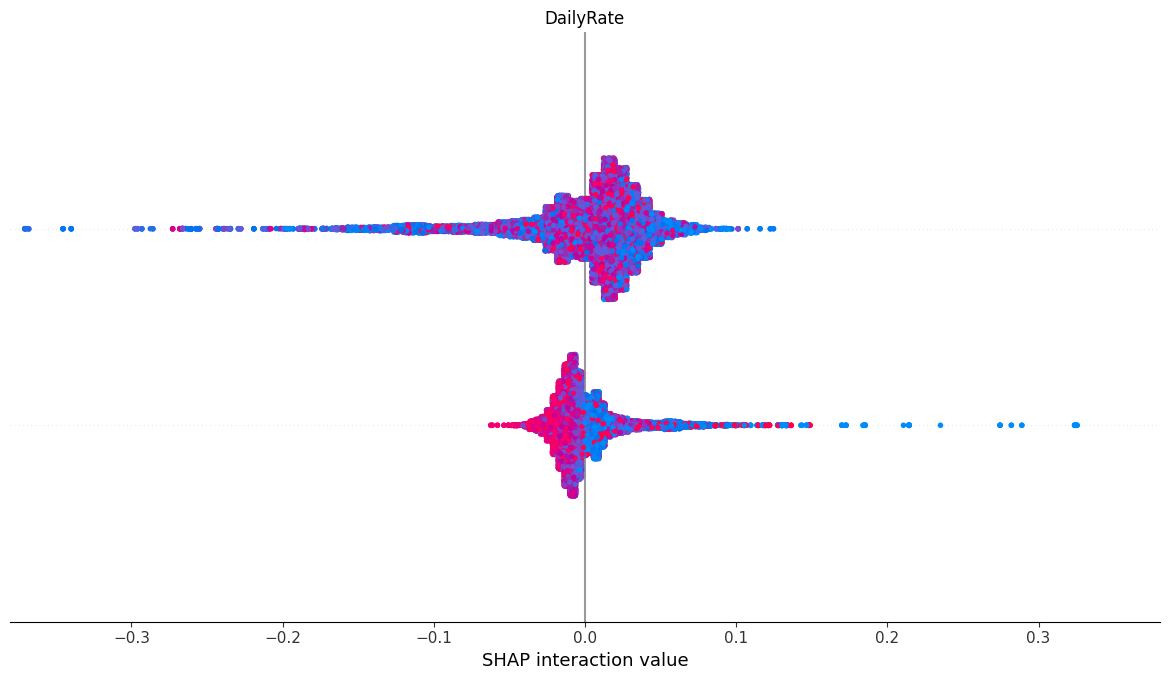

In [ ]:
import shap
import matplotlib.pyplot as plt

# Make sure your model is trained
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# If it's a list (one for each class), pick class 1 (positive)
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]  # binary classification, pick class 1
else:
    shap_values_to_plot = shap_values

# Now plot
shap.summary_plot(shap_values_to_plot, X_train, plot_type="bar")


##XGBoost

Training an XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Making Predictions with XGBoost Model

In [ ]:
y_pred = xgb_model.predict(X_test)


Evaluating XGBoost Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10

Confusion Matrix:
[[7 0]
 [1 2]]


Fitting XGBoost Model

In [ ]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Adjusting Prediction Threshold for XGBoost Model

In [ ]:
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob > 0.4).astype(int)  # Change threshold from 0.5 to 0.4


Performance Metrics After Threshold Adjustment

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f'Accuracy: {accuracy}')

# Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_adjusted, average='binary')
print(f'Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')


Accuracy: 0.9
Precision: 1.0, Recall: 0.6666666666666666, F1-Score: 0.8
ROC AUC: 1.0


Visualizing Feature Importance from XGBoost Model

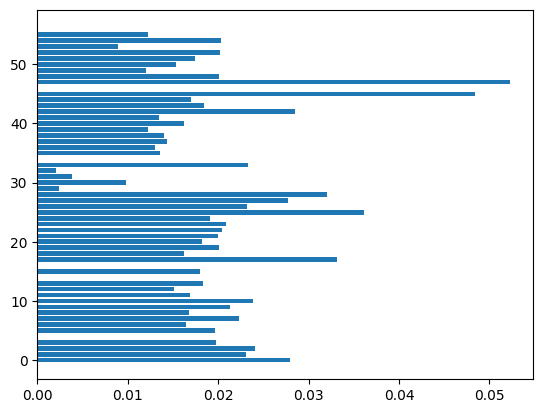

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb_model.feature_importances_.sort()
plt.barh(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()


Plotting Confusion Matrix Using Seaborn Heatmap

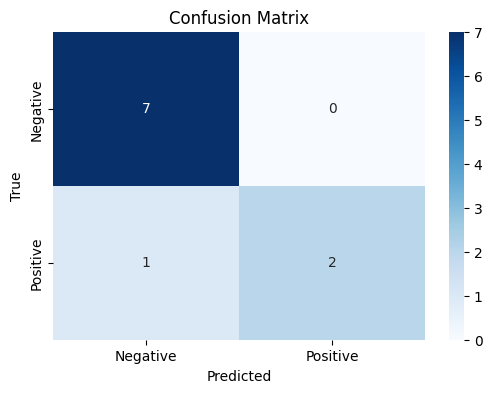

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Plotting the Precision-Recall Curve

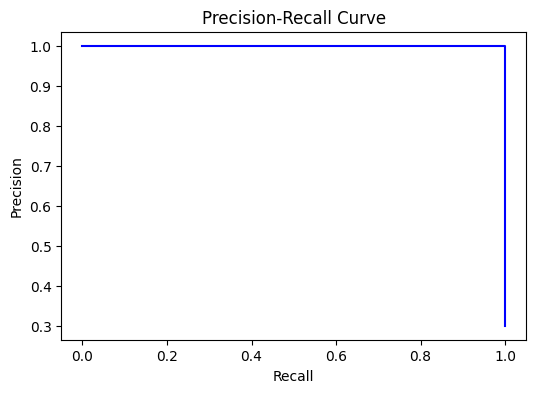

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Plotting the ROC Curve for Model Evaluation

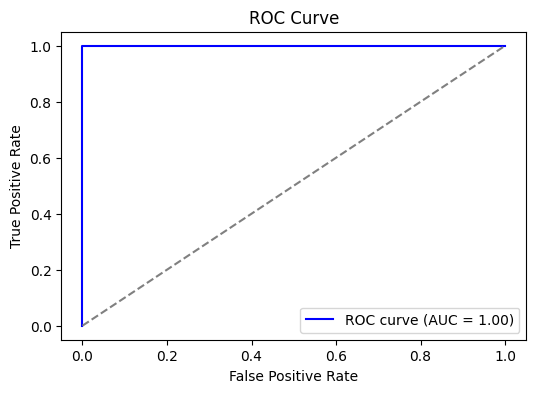

In [ ]:
from sklearn.metrics import roc_curve

# Get ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Analyzing Model Performance with a Learning Curve

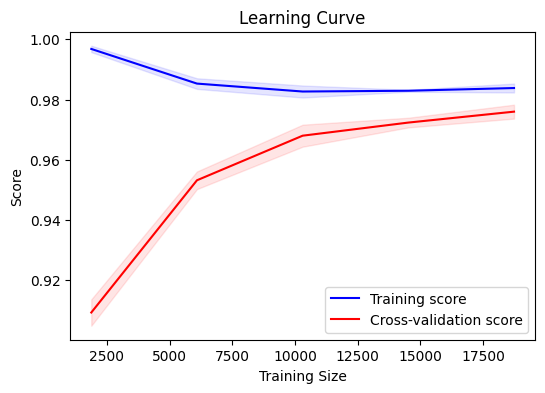

In [ ]:
from sklearn.model_selection import learning_curve

# Get learning curves
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5, n_jobs=-1)

# Calculate mean and std deviation for train/test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


#Naive Bayes

Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('EEmployeeAttrition.csv')


<ipython-input-58-20806c8ff724>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EEmployeeAttrition.csv')  # adjust path if needed


Encoding Categorical Features

In [ ]:
# 📌 Step 3: Encode ALL Categorical (Object) Columns Automatically
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).replace('nan', 'Missing').fillna('Missing')  # clean mixed types
    df[col] = le.fit_transform(df[col])  # encode all object columns to numbers


Filling Missing Values

In [ ]:
# Impute missing values in all columns
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())  # Numeric: median
    else:
        df[col] = df[col].fillna('Missing')         # Categorical: placeholder


Define Features and Target

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']


Split Dataset into Train Test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Sanitize Train/Test Data (Final NaN Check)

In [ ]:
for dataset in [X_train, X_test]:
    for col in dataset.columns:
        if dataset[col].dtype in ['float64', 'int64']:
            dataset[col] = dataset[col].fillna(dataset[col].median())
        else:
            dataset[col] = dataset[col].astype(str).replace('nan', 'Missing')
            dataset[col] = dataset[col].fillna('Missing')


Training the naive Bayes model

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

Make Predictions and Evaluate the Model

In [ ]:
y_pred = nb.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[3649    7  293]
 [   3    0    2]
 [ 510    0  224]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      3949
           1       0.00      0.00      0.00         5
           2       0.43      0.31      0.36       734

    accuracy                           0.83      4688
   macro avg       0.44      0.41      0.42      4688
weighted avg       0.81      0.83      0.81      4688

Accuracy Score: 0.8261518771331058


#Logistic Regression

📌 Step 1: Import Required Libraries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


📌 Step 2: Load the Dataset

In [ ]:
df = pd.read_csv('EEmployeeAttrition.csv')

<ipython-input-81-af86a0eaac23>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EEmployeeAttrition.csv')


📌 Step 3: Encode All Categorical Variables

In [ ]:
# Automatically encode all object-type columns
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).replace('nan', 'Missing').fillna('Missing')
    df[col] = le.fit_transform(df[col])


📌 Step 4: Fill Missing Values

In [ ]:
# Fill missing numeric values with median
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())


📌 Step 5: Define Features and Target

In [ ]:

X = df.drop('Attrition', axis=1)
y = df['Attrition']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


📌 Step 6: Split Dataset into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


📌 Step 7: Train the Logistic Regression Model

In [ ]:
lr = LogisticRegression(max_iter=5000)  # bumped from 1000 to 5000
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

📌 Step 8: Make Predictions and Evaluate the Model

In [ ]:
y_pred = lr.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[3901    0   48]
 [   5    0    0]
 [ 667    0   67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      3949
           1       0.00      0.00      0.00         5
           2       0.58      0.09      0.16       734

    accuracy                           0.85      4688
   macro avg       0.48      0.36      0.36      4688
weighted avg       0.81      0.85      0.80      4688

Accuracy Score: 0.8464163822525598


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Linear Regression


Importing modules


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Convert Attrition to binary

In [ ]:
df["Attrition_Binary"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

Select only numerical features (excluding target)

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [col for col in num_cols if col != "Attrition_Binary"]

X = df[num_cols]
y = df["Attrition_Binary"]

Scale numerical features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train/test split with stratification to keep class balance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

Train linear regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Predict probabilities and threshold at 0.5

In [ ]:
y_pred_prob = lr.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

Evaluate

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10

Confusion Matrix:
 [[7 0]
 [1 2]]
